In [71]:
# %matplotlib inline
# %matplotlib widget

try:
    import mpld3
    mpld3.enable_notebook()
    print("Modul mpld3 je instaliran.")
except:
    print("Modul mpld3 nije instaliran.")

# import matplotlib as mpl
# mpl.rc('text', usetex = True)
# mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from fxpmath import Fxp

import funcs
import importlib
importlib.reload(funcs)  # Importing the latest version of funcs.py

Modul mpld3 je instaliran.


<module 'funcs' from '/home/urosminoski/Desktop/FAKS/MASTER/All-Digital-RF-Transmitter-in-FPGA-master-/sim/v1.4/python/jupyter/funcs.py'>

### Input signal

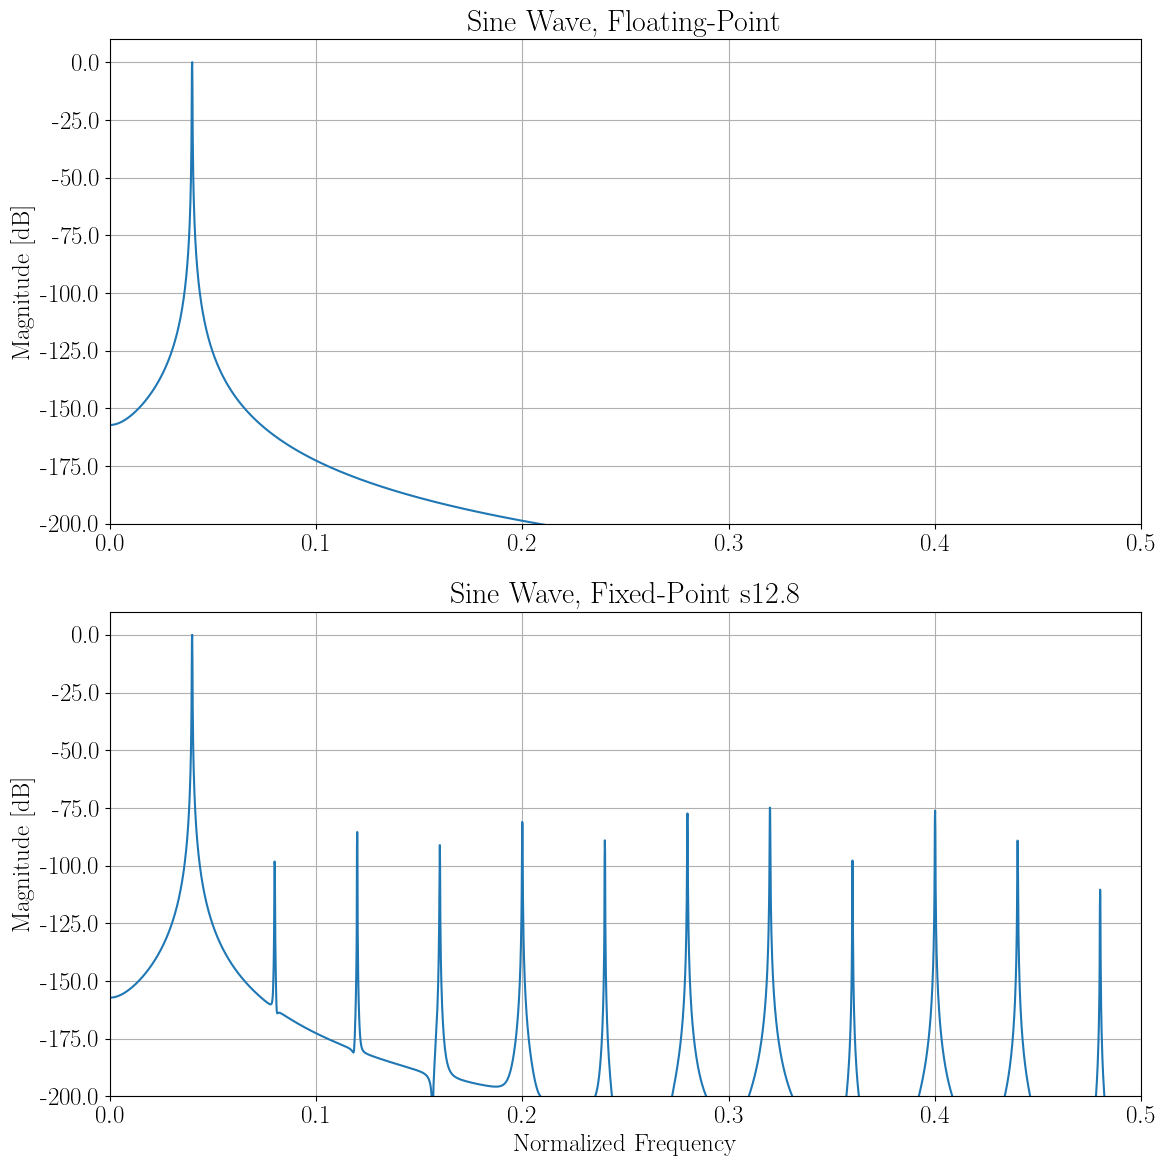

In [94]:
N = 8*1024
M = 3
OSR = 8
F = 0.32

# x = 2**(M-1) * np.sin(2*np.pi*np.floor(2/7 * N/OSR) * np.arange(N)/N)
x = 2**(M-1) * np.sin(2*np.pi*F*np.arange(N)/OSR)
xfxp = [Fxp(val, signed=True, n_word=12, n_frac=8, overflow='saturate', rounding='around') for val in x]

xfxp_ = np.array([val() for val in xfxp])

w = signal.hann(len(x), False)
x_win = x*w
xfxp_win = xfxp_*w
funcs.plot_fft_dB(x_win, xfxp_win, ylim1=(-200, 10), ylim2=(-200, 10), title1='Sine Wave, Floating-Point', title2='Sine Wave, Fixed-Point s12.8');

### Delta sigma modulation

In [95]:
yfxp_tread = np.array([val for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0, type='mid-tread')])
yfxp_rise = np.array([val for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0, type='mid-rise')])

In [96]:
w = signal.hann(len(yfxp_tread), False)
yfxp_tread_win = yfxp_tread * w
yfxp_rise_win = yfxp_rise * w

(Mid-Tread) max = 7.0, min = -8.0
(Mid-Tread) Average = 0.0028076171875
(Mid-Rise) max = 7.0, min = -7.0
(Mid-Rise) Average = 0.00146484375


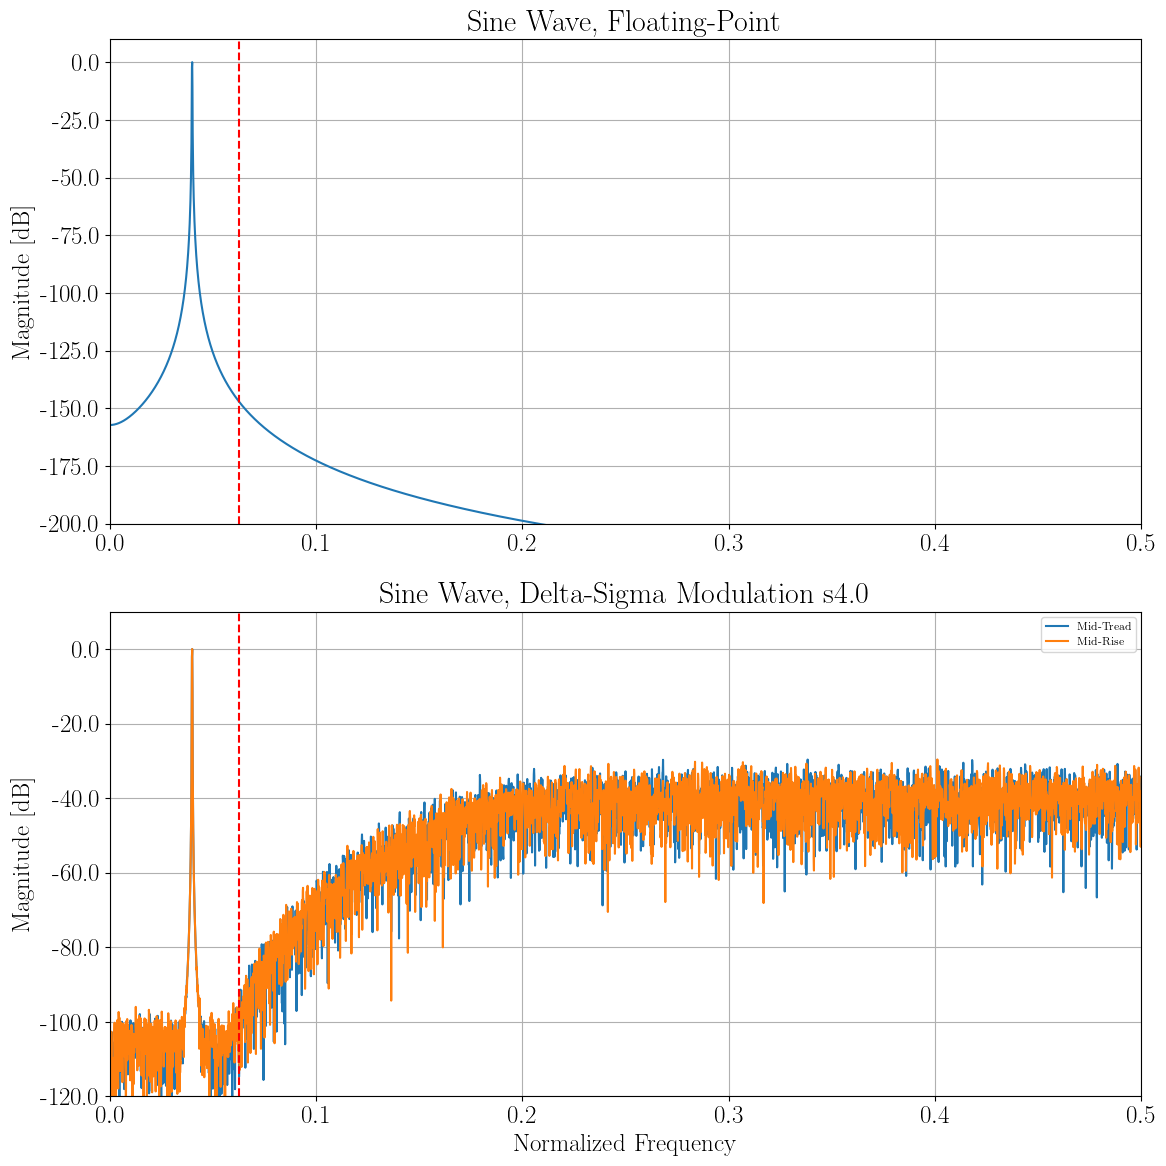

In [97]:
print(f"(Mid-Tread) max = {np.max(yfxp_tread)}, min = {np.min(yfxp_tread)}")
print(f"(Mid-Tread) Average = {np.sum(yfxp_tread)/len(yfxp_tread)}")

print(f"(Mid-Rise) max = {np.max(yfxp_rise)}, min = {np.min(yfxp_rise)}")
print(f"(Mid-Rise) Average = {np.sum(yfxp_rise)/len(yfxp_rise)}")

funcs.plot_fft_dB(x_win, [yfxp_tread_win, yfxp_rise_win], ylim1=(-200, 10), ylim2=(-120, 10), legend2=['Mid-Tread', 'Mid-Rise'], title1='Sine Wave, Floating-Point', title2='Sine Wave, Delta-Sigma Modulation s4.0', OSR=OSR)

### LUT 1

len(x) = 8192, len(y) = 131072
Ratio = 16
Average = 0.0003509521484375


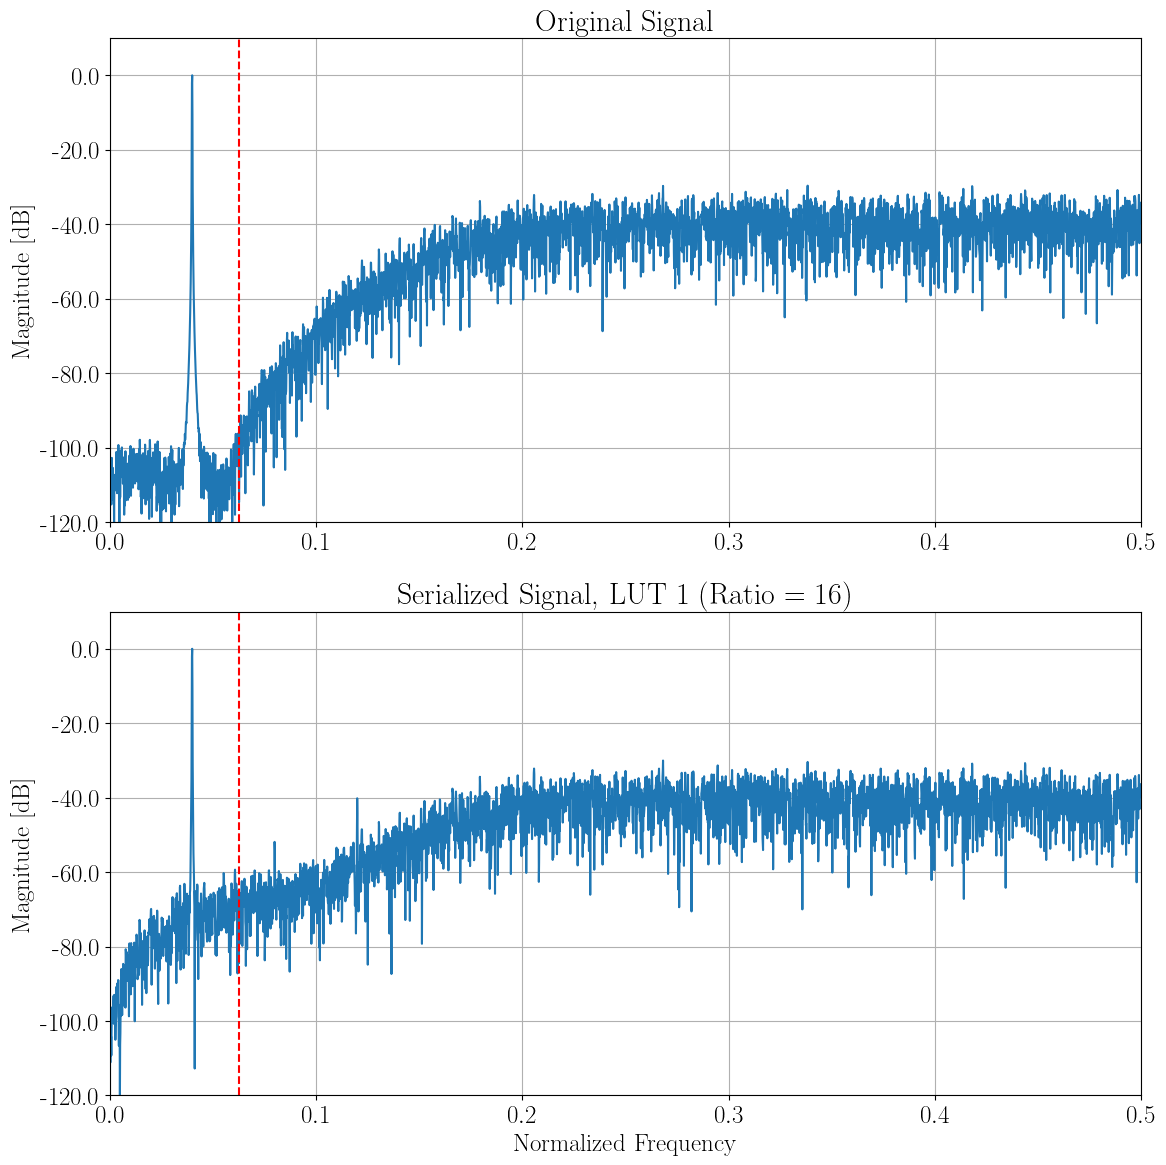

In [98]:
y1b = funcs.convert_1b(yfxp_tread, funcs.LUT1)

w = signal.hann(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp_tread)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp_tread))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_tread_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 1 (Ratio = {int(len(y1b)/len(yfxp_tread))})", OSR=OSR)

### LUT 2

len(x) = 8192, len(y) = 262144
Ratio = 32
Average = 0.0003509521484375


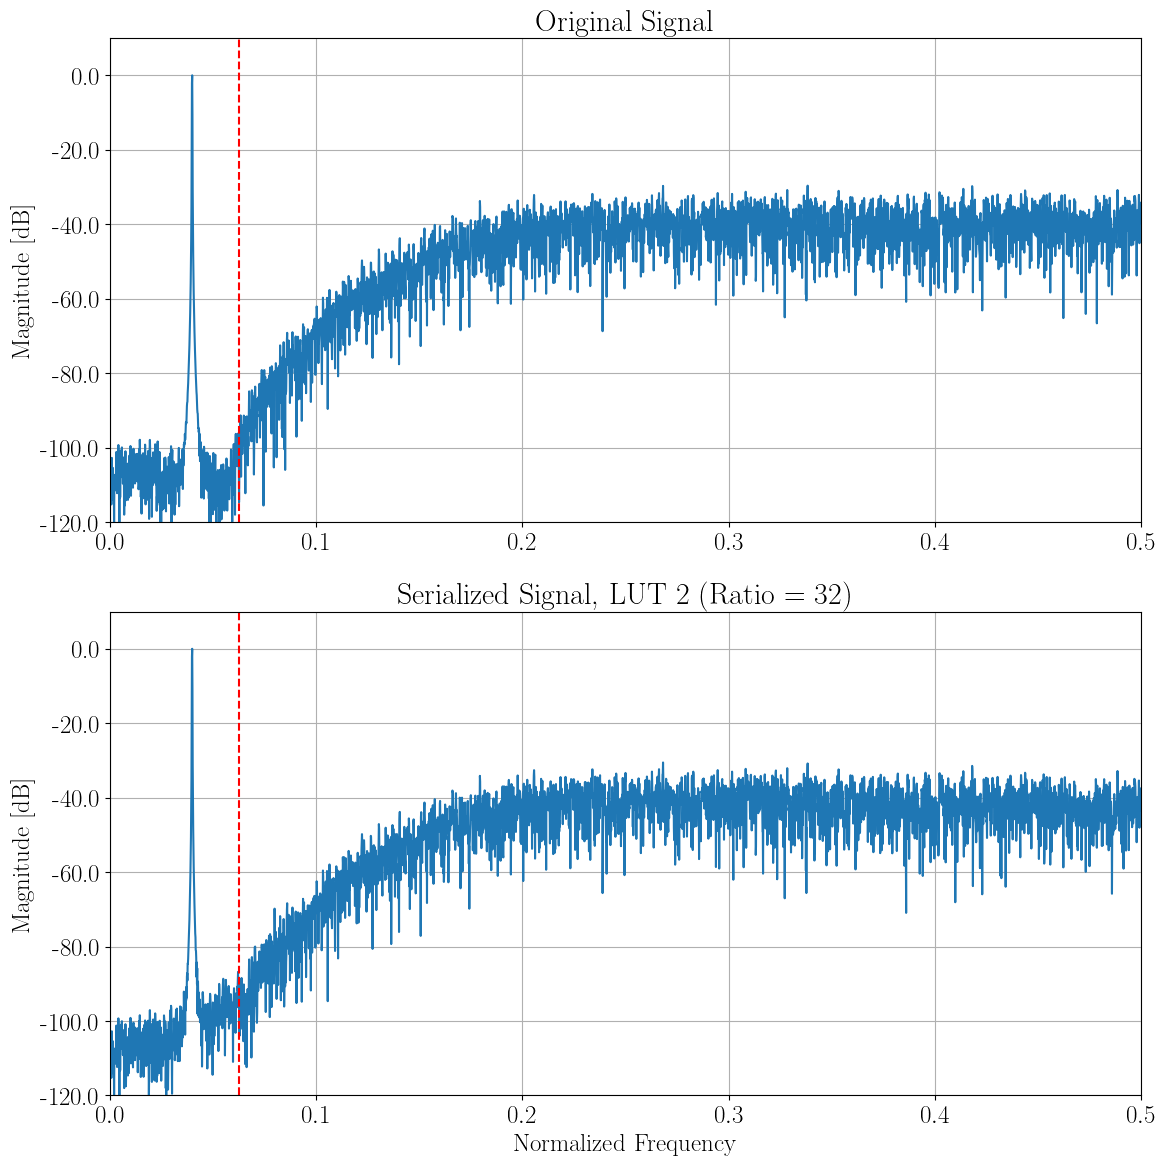

In [99]:
y1b = funcs.convert_1b(yfxp_tread, funcs.LUT2)

w = signal.hann(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp_tread)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp_tread))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_tread_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 2 (Ratio = {int(len(y1b)/len(yfxp_tread))})", OSR=OSR)

### LUT 3

len(x) = 8192, len(y) = 262144
Ratio = 32
Average = 0.0003509521484375


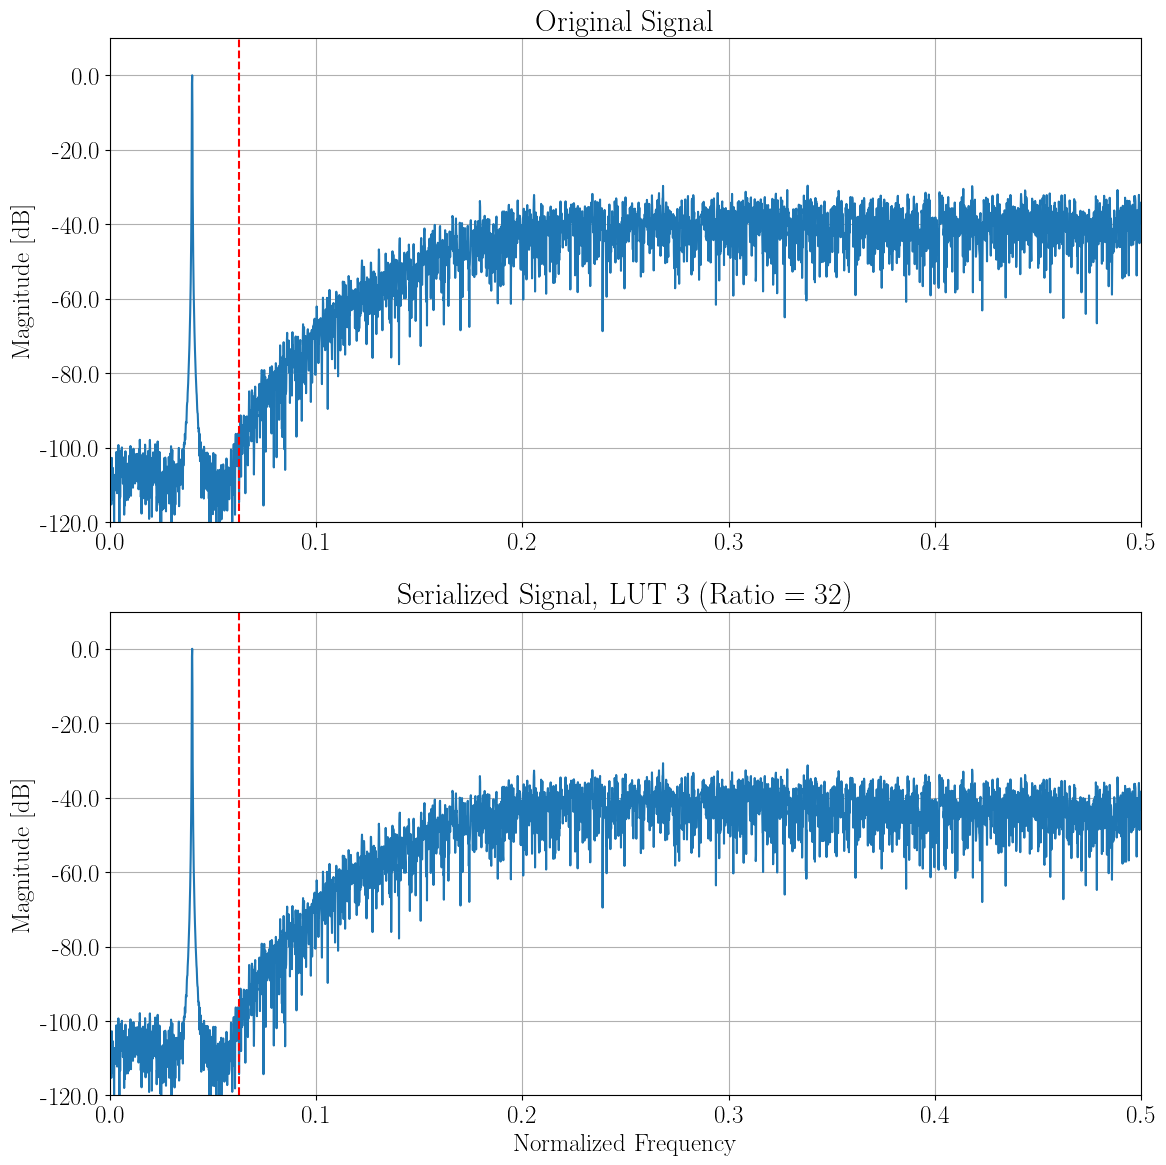

In [100]:
y1b = funcs.convert_1b(yfxp_tread, funcs.LUT3)

w = signal.hann(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp_tread)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp_tread))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_tread_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 3 (Ratio = {int(len(y1b)/len(yfxp_tread))})", OSR=OSR)

### LUT 4

len(x) = 8192, len(y) = 122880
Ratio = 15
Average = 0.06686197916666667
0.00146484375


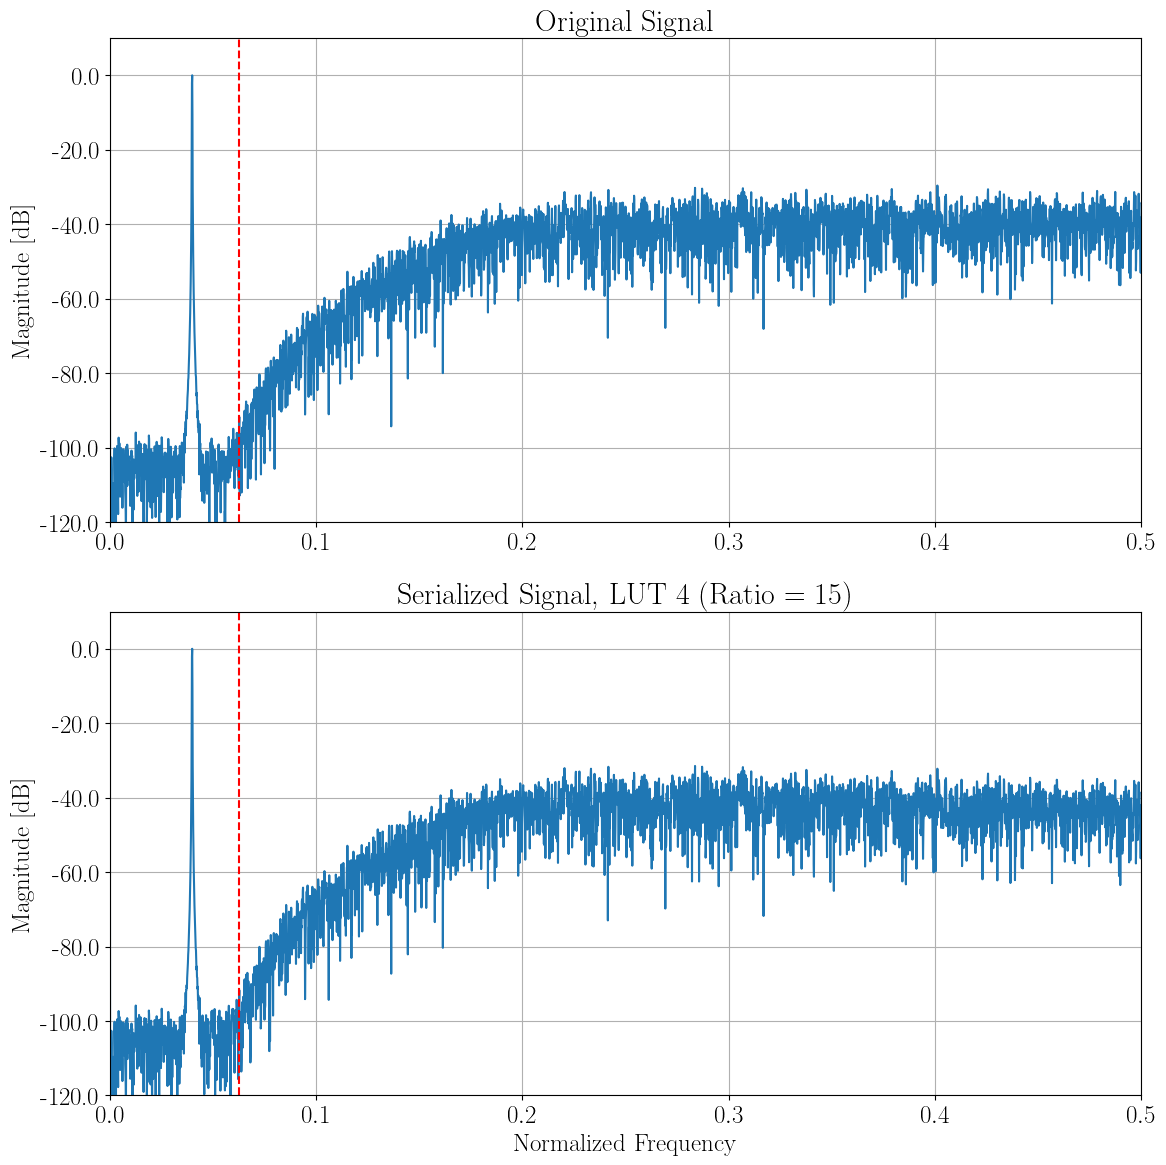

In [101]:
y1b = funcs.convert_1b(yfxp_rise, funcs.LUT4)

w = signal.hann(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp_rise)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp_rise))}")
print(f"Average = {np.mean(y1b)}")
print(np.mean(yfxp_rise))

funcs.plot_fft_dB(yfxp_rise_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 4 (Ratio = {int(len(y1b)/len(yfxp_rise))})", OSR=OSR)

### LUT 5

len(x) = 8192, len(y) = 155648
Ratio = 19
Average = 0.05278577302631579


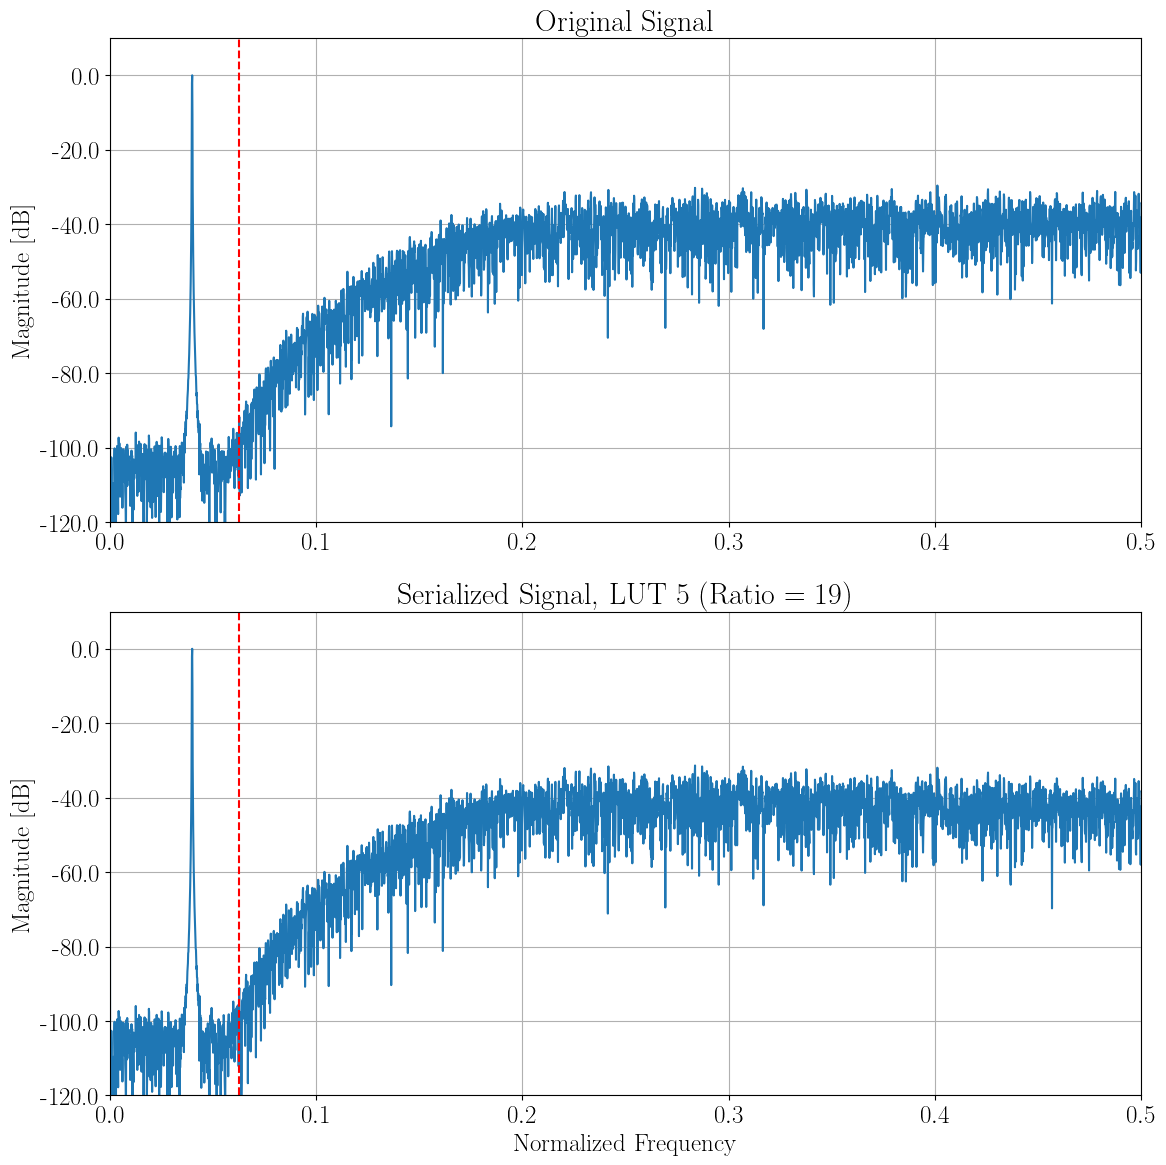

In [102]:
y1b = funcs.convert_1b(yfxp_rise, funcs.LUT5)

w = signal.hann(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp_rise)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp_rise))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_rise_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 5 (Ratio = {int(len(y1b)/len(yfxp_rise))})", OSR=OSR)

# Testing Mid-Rise

In [52]:
importlib.reload(funcs)  # Importing the latest version of funcs.py

<module 'funcs' from '/home/urosminoski/Desktop/FAKS/MASTER/All-Digital-RF-Transmitter-in-FPGA-master-/sim/v1.4/python/jupyter/funcs.py'>

In [47]:
yfxp = np.array([val for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0, type='mid-tread')])
yfxp_ = np.array([val for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0, type='mid-rise')])

In [48]:
print(yfxp[:20])
print(yfxp_[:20])

[ 0.  1.  2.  2.  5.  3.  3.  5.  3.  4.  2.  1.  1. -1. -1. -3. -2. -5.
 -2. -5.]
[ 0.  0.  5.  0.  3.  5.  4.  5.  1.  5.  1.  3.  0. -1. -1. -3. -3. -2.
 -6. -3.]


In [49]:
print(np.mean(yfxp), np.mean(yfxp_))

0.00146484375 0.0


In [55]:
yfxp_i = np.array([val for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0, type='mid-tread')])


In [59]:
print(np.mean(yfxp_i))

-0.004633631557226181


In [69]:
tmp_tread = Fxp(0, n_word=4, n_frac=0, overflow='saturate', rounding='around')
tmp_rise = Fxp(0, n_word=4, n_frac=0, overflow='saturate', rounding='floor')

tread = []
rise = []
for i in range(len(yfxp_i)):
    tmp_tread( yfxp_i[i] )
    tread.append(tmp_tread())

    tmp_rise( yfxp_i[i] )
    rise.append(tmp_rise()+0.5)

print(tread[:10])
print(rise[:10])

y1b_LUT3 = funcs.convert_1b(tread, funcs.LUT3)
y1b_LUT4 = funcs.convert_1b(rise, funcs.LUT4)

[0.0, 1.0, 2.0, 2.0, 5.0, 3.0, 3.0, 5.0, 3.0, 4.0]
[0.5, 0.5, 1.5, 2.5, 5.5, 2.5, 3.5, 4.5, 3.5, 3.5]


In [70]:
print(np.mean(tread), np.mean(rise))
print(np.mean(y1b_LUT3), np.mean(y1b_LUT4))

0.00146484375 -0.01123046875
0.00018310546875 -0.0014973958333333334


[0.5, 0.5, 1.5, 2.5, 5.5, 2.5, 3.5, 4.5, 3.5, 3.5]


In [67]:
print(np.mean(tread), np.mean(rise))

0.00146484375 -0.01123046875


In [50]:
yfxp_ = []
for i in range(len(yfxp)):
    tmp = yfxp[i]
    if yfxp[i] % 2 == 0:
        tmp+=1
    yfxp_.append(tmp)

print(yfxp[:10])
print(yfxp_[:10])

[0. 1. 2. 2. 5. 3. 3. 5. 3. 4.]
[1.0, 1.0, 3.0, 3.0, 5.0, 3.0, 3.0, 5.0, 3.0, 5.0]


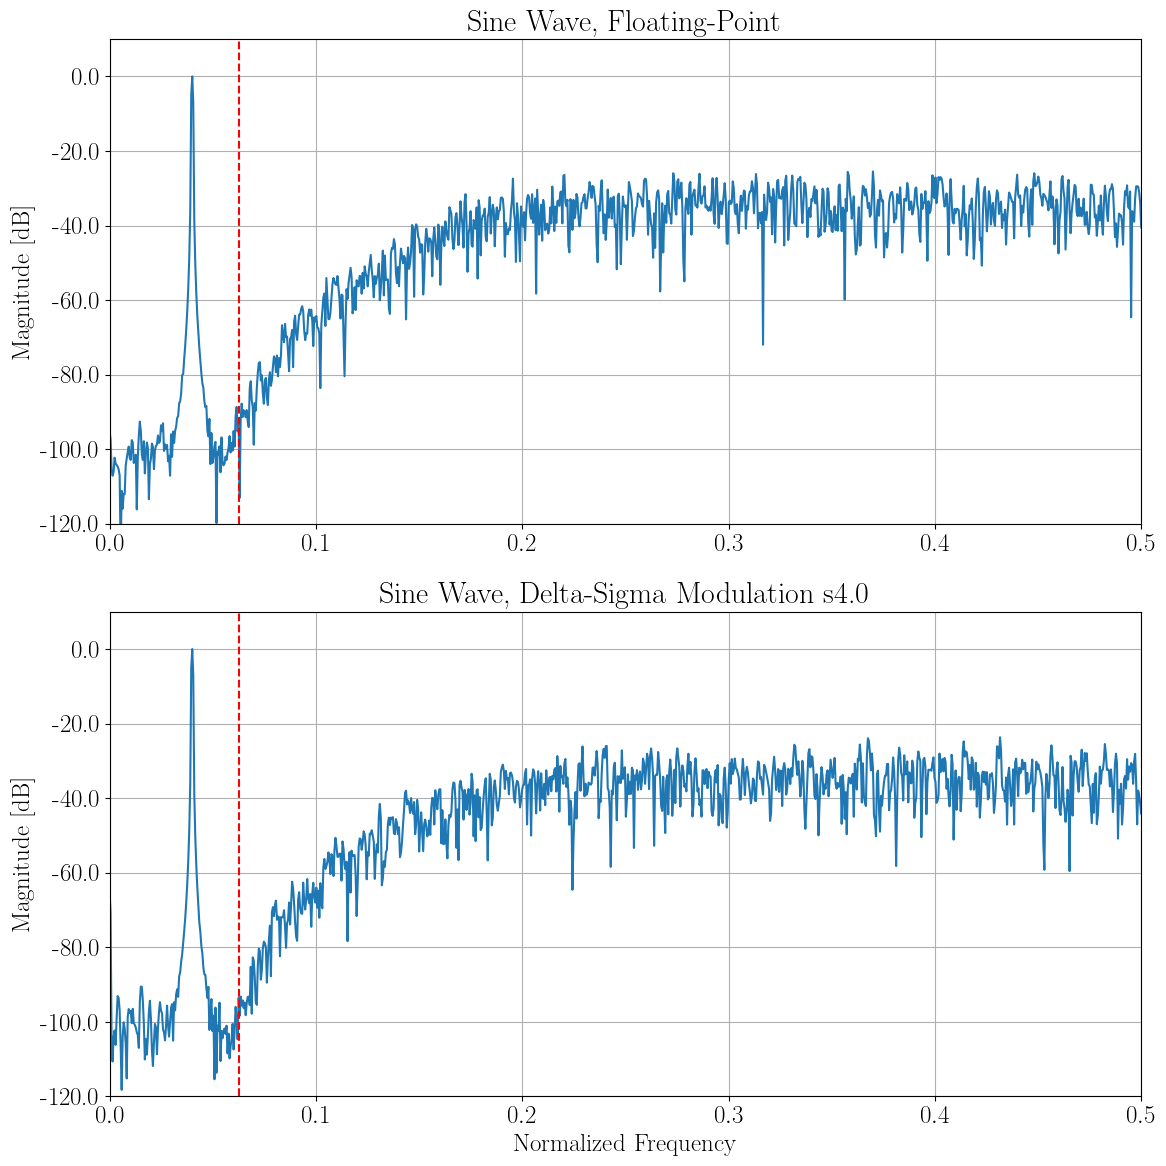

In [45]:
w = signal.hann(len(yfxp), False)
yfxp_win = yfxp * w
yfxp_win_ = yfxp_ * w

funcs.plot_fft_dB(yfxp_win, yfxp_win_, ylim1=(-120, 10), ylim2=(-120, 10), title1='Sine Wave, Floating-Point', title2='Sine Wave, Delta-Sigma Modulation s4.0', OSR=OSR)
plt.show()

In [90]:
tmp_tread = Fxp(0, n_word=4, n_frac=0, overflow='saturate', rounding='around')
tmp_rise = Fxp(0, n_word=4, n_frac=0, overflow='saturate', rounding='floor')

x = np.linspace(-8, 8, 1024)

tread = []
rise = []
for i in range(len(x)):
    tmp_tread( x[i] )
    tread.append(tmp_tread())

    tmp_rise( x[i] )
    rise.append(tmp_rise())

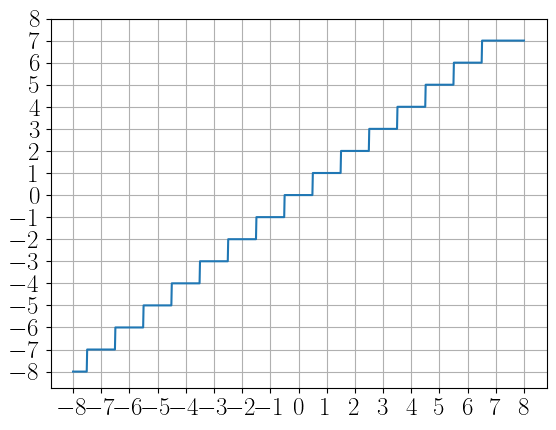

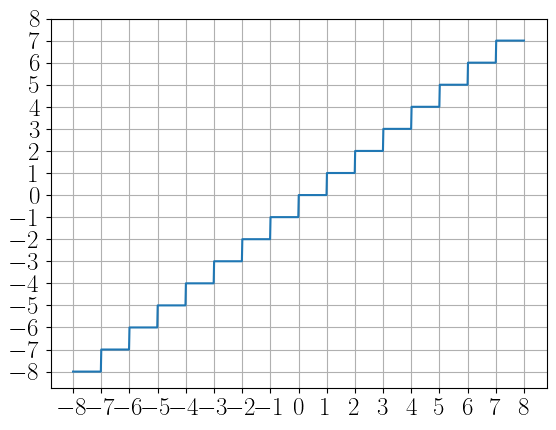

In [91]:
plt.cla()
plt.plot(x, tread)
plt.grid()
ticks = range(-8, 9)  # Create a range from -8 to 8 (inclusive)
plt.xticks(ticks)  # Set x-axis ticks
plt.yticks(ticks)  # Set y-axis ticks
plt.show()

plt.plot(x, rise)
plt.grid()
ticks = range(-8, 9)  # Create a range from -8 to 8 (inclusive)
plt.xticks(ticks)  # Set x-axis ticks
plt.yticks(ticks)  # Set y-axis ticks
plt.show()

In [92]:
y1b = funcs.convert_1b(rise, funcs.LUT4)

In [93]:
print(np.mean(y1b))

0.0


In [31]:
print(np.mean(rise))

-0.5
